# Exercise Ten: Mapping, Twitter Style
In this week's exercise, we will be working from the class demo. To use the live features, you'll need to get a Twitter account approved through the Developer Portal as reviewed in class. If you can't get approval, you can use the alternate method of importing your data via TAGS

Your application should:

- Import or collect tweets using a keyword or hashtag. Watch your rate limiting!
- Use Pandas to sort and analyze your tweets.
- Calculate user coordinates, where feasible, for the set of collected tweets. Again, watch your rate limiting!
- Map the tweets using the calculated locations.
- Use at least one data visualization from a previous exercise, demo, or the course text to analyze a different element of your tweets.

As a bonus challenge, try to map some other quality of your data. For instance, you might only map the locations where a certain word or hashtag is used, or try to visualize the quantity of tweets that share a location using a larger radius dot.

## Import Tweets

- A geographical analysis of Twitter users interested in visiting National Parks using the #FindYourPark hashtag.
- Per guidance (thank you again), created a separate ini file to store Twitter Developer credentials.
- Sampled 300 Tweets from the month of October as in the example.

In [11]:
import configparser
CONFIG = configparser.ConfigParser()
CONFIG.read('credentials.ini')



['credentials.ini']

In [12]:
import tweepy

auth = tweepy.OAuthHandler(CONFIG['DEFAULT']['consumer_key'], CONFIG['DEFAULT']['consumer_secret'])
auth.set_access_token(CONFIG['DEFAULT']['access_token'], CONFIG['DEFAULT']['access_token_secret'])

api = tweepy.API(auth, wait_on_rate_limit=True)

public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

A DNA analysis confirmed that Ernie LaPointe, a South Dakota writer, is the great-grandson of Sitting Bull, a legen… https://t.co/VNu7tzBwKH
So much to do this weekend and next. And the weather is finally perfect for it all. Details:… https://t.co/2ENLClGZcz
Breaking News: Letitia James, the New York attorney general, declared her bid for governor. She oversaw the sexual… https://t.co/Cw3pA07m3y
The rapper Fetty Wap was arrested by FBI agents at Citi Field on Thursday, the first night of the Rolling Loud musi… https://t.co/Rau5YmRFVO
💍 Planning a Disney-themed wedding off property might take some extra work and extra creativity, but it also helps… https://t.co/6IgnJve0wl
Annual inflation is climbing at the fastest pace in three decades in the U.S. as prices for couches, cars and housi… https://t.co/UkhlS9UMfJ
RT @ShanaVWhite: “Move slower and empower people.” -@ruha9
When the female crime writer Carmen Mola won one of Spain's biggest literary awards, three men came to collect the… http

In [13]:
import pandas as pd

search_words = "#FindYourPark"
date_since = "2021-10-01"
tweets = tweepy.Cursor(api.search_tweets,
              q=search_words, lang="en").items(300)

tweets_sorted = [[tweet.user.screen_name, tweet.geo, tweet.user.location, tweet.text] for tweet in tweets]

## Using Pandas to sort and analyze Tweets

In [14]:
tdf = pd.DataFrame(data=tweets_sorted, columns=['user', 'coordinates','location', 'tweet'])
print(tdf)

                user                                        coordinates  \
0    iwasthere102908                                               None   
1    DiamondDreamsVR                                               None   
2     Roger_Osorio22  {'type': 'Point', 'coordinates': [35.38828162,...   
3      wander_filled                                               None   
4      ms_magallanes                                               None   
..               ...                                                ...   
295          SheilaS                                               None   
296      UESociology                                               None   
297    GraemeBWilson                                               None   
298    Nv_pyromelana                                               None   
299    GreatBasinNPS                                               None   

              location                                              tweet  
0    Pennsylvania, USA 

In [15]:
locs = tdf['location'].value_counts()
print(locs)

                       63
Washington, DC         11
Austin, TX              9
Wyoming, USA            9
Philadelphia            6
                       ..
Manhattanland           1
Hudson County, N.J.     1
Seattle                 1
Russia, Lipetsk         1
Baker, NV               1
Name: location, Length: 157, dtype: int64


## Calculating user coordinates where feasible.

In [16]:

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent='twitter-analysis-client')
limited = RateLimiter(geolocator.geocode, min_delay_seconds=1)

def find_location(row):
    place = row['location']
    location = limited(place)
    
    if location != None:
        return location.latitude, location.longitude
    else:
        return "Not Found", "Not Found"

tdf[['latitude','longitude']] = tdf.apply(find_location, axis="columns", result_type="expand")
tdf

RateLimiter caught an error, retrying (0/2 tries). Called with (*('San Jose, CA',), **{}).
Traceback (most recent call last):
  File "C:\Users\ShelleyM\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\ShelleyM\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\ShelleyM\anaconda3\lib\http\client.py", line 1348, in getresponse
    response.begin()
  File "C:\Users\ShelleyM\anaconda3\lib\http\client.py", line 316, in begin
    version, status, reason = self._read_status()
  File "C:\Users\ShelleyM\anaconda3\lib\http\client.py", line 277, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\ShelleyM\anaconda3\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\ShelleyM\anaconda3\lib\ssl.py", line 1241, in

,user,coordinates,location,tweet,latitude,longitude
0,iwasthere102908,None,"Pennsylvania, USA","RT @INDEPENDENCENHP: Discover what ""all men cr...",40.969989,-77.727883
1,DiamondDreamsVR,None,"Philadelphia, USA",RT @IHTrust: It's a beautiful Fall day at @IND...,39.952724,-75.163526
2,Roger_Osorio22,"{'type': 'Point', 'coordinates': [35.38828162,...","Wyoming, USA",What a beautiful building. Can't wait to retur...,43.170026,-107.568534
3,wander_filled,None,"Woodstock, GA",Who knew we would have so much fun tubing a ri...,34.101411,-84.519219
4,ms_magallanes,None,"Texas, USA",RT @dayhikingtrails: Great trails also surroun...,31.816038,-99.512099
...,...,...,...,...,...,...
295,SheilaS,None,"Round Rock, Texas",Looking for an outdoor getaway near Austin / @...,30.508592,-97.678806
296,UESociology,None,"Evansville, IN",Beautiful view of Yosemite after recent storms...,37.974764,-87.555848
297,GraemeBWilson,None,"Denholm, Scotland",RT @CavernsNPS: Brazilian free-tailed bats can...,55.458038,-2.683624
298,Nv_pyromelana,None,Nevada,RT @CavernsNPS: Brazilian free-tailed bats can...,39.515882,-116.853723


## Map the Tweets

Surprising number of international locations given that this is a hashtag about US National Parks

In [17]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (20, 10)

C:\Users\ShelleyM\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


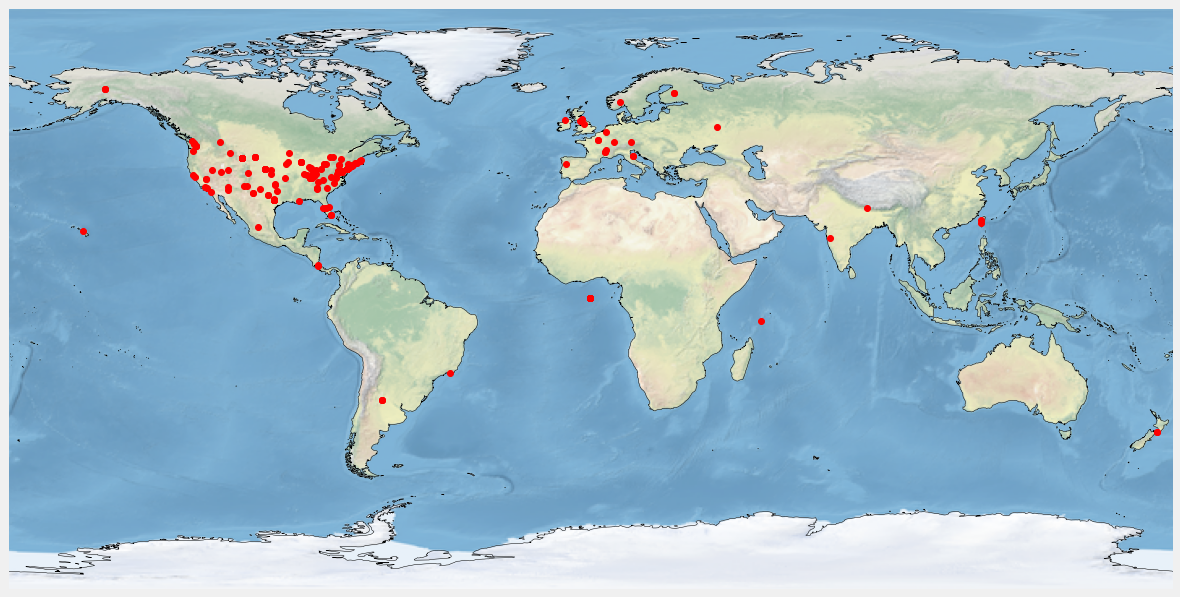

In [18]:
import cartopy.crs as ccrs
from matplotlib.patches import Circle

lats = tdf['latitude'].dropna()
longs = tdf['longitude'].dropna()

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
    
for i in range(0, len(lats)):
    ax.plot(longs[i], lats[i], 'ro', transform=ccrs.PlateCarree())
                                                                                              
ax.coastlines(resolution='50m')
ax.set_global()

plt.show()

## Additional Visualization

In [19]:
tdf['user'].value_counts()

dayhikingtrails    15
NPSYouth           10
thorsenmark         9
Roger_Osorio22      7
NatParkObsessed     6
                   ..
bill_rotellla       1
kingsley_bryant     1
ChrisGeorgeKC       1
BostonHarborNow     1
GreatBasinNPS       1
Name: user, Length: 214, dtype: int64

<AxesSubplot:title={'center':'Most Frequent User Names in the Sample'}>

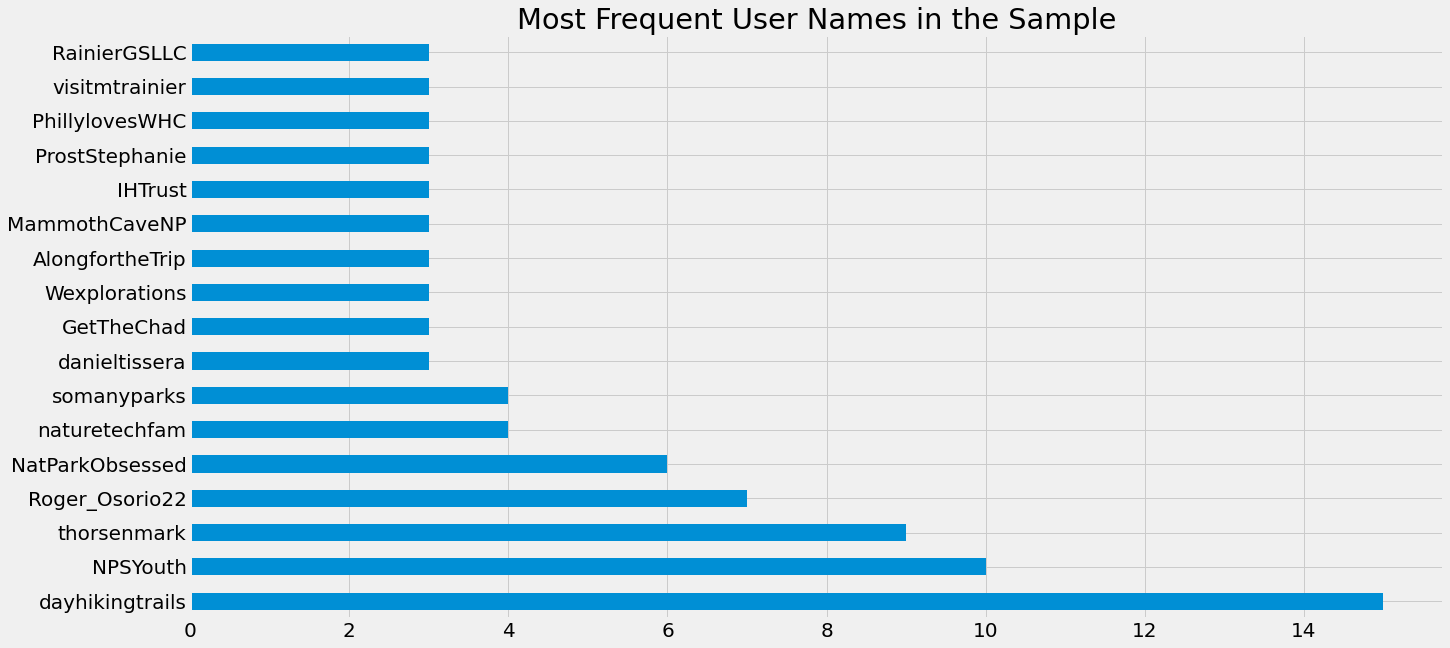

In [22]:
tdf['user'].value_counts()[:17].plot(kind="barh", title="Most Frequent User Names in the Sample")

## No Bonus Attempted this Week